In [22]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv(r"C:\Users\rgorbunov\Documents\ITMO\git_projects\datasets\bukva-dataset\annotations.tsv", sep='\t')
print(data.shape)

(3862, 9)


In [24]:
labels = np.arange(len(data['text'].unique()))
map_dict = {lab: encoded_lab for lab, encoded_lab in zip(sorted(data['text'].unique()), labels)}
data['label_encoded'] = data['text'].map(map_dict)

In [25]:
df_test = data[data['train'] == False].copy()
df_test['split'] = 'test'
df_train_pool = data[data['train'] == True].copy()

In [26]:
X_train, X_val = train_test_split(
    df_train_pool, 
    test_size=0.1, 
    random_state=42, 
    stratify=df_train_pool['text']
)

In [27]:
X_train = X_train.copy()
X_val = X_val.copy()

X_train['split'] = 'train'
X_val['split'] = 'val'

final_df = pd.concat([X_train, X_val, df_test], ignore_index=True)

final_df['train'] = final_df['split'] == 'train'
final_df['val'] = final_df['split'] == 'val'
final_df['test'] = final_df['split'] == 'test'

In [28]:
final_df = final_df[['attachment_id', 'text', 'label_encoded', 'split']] # Можно добавить другие нужные колонки


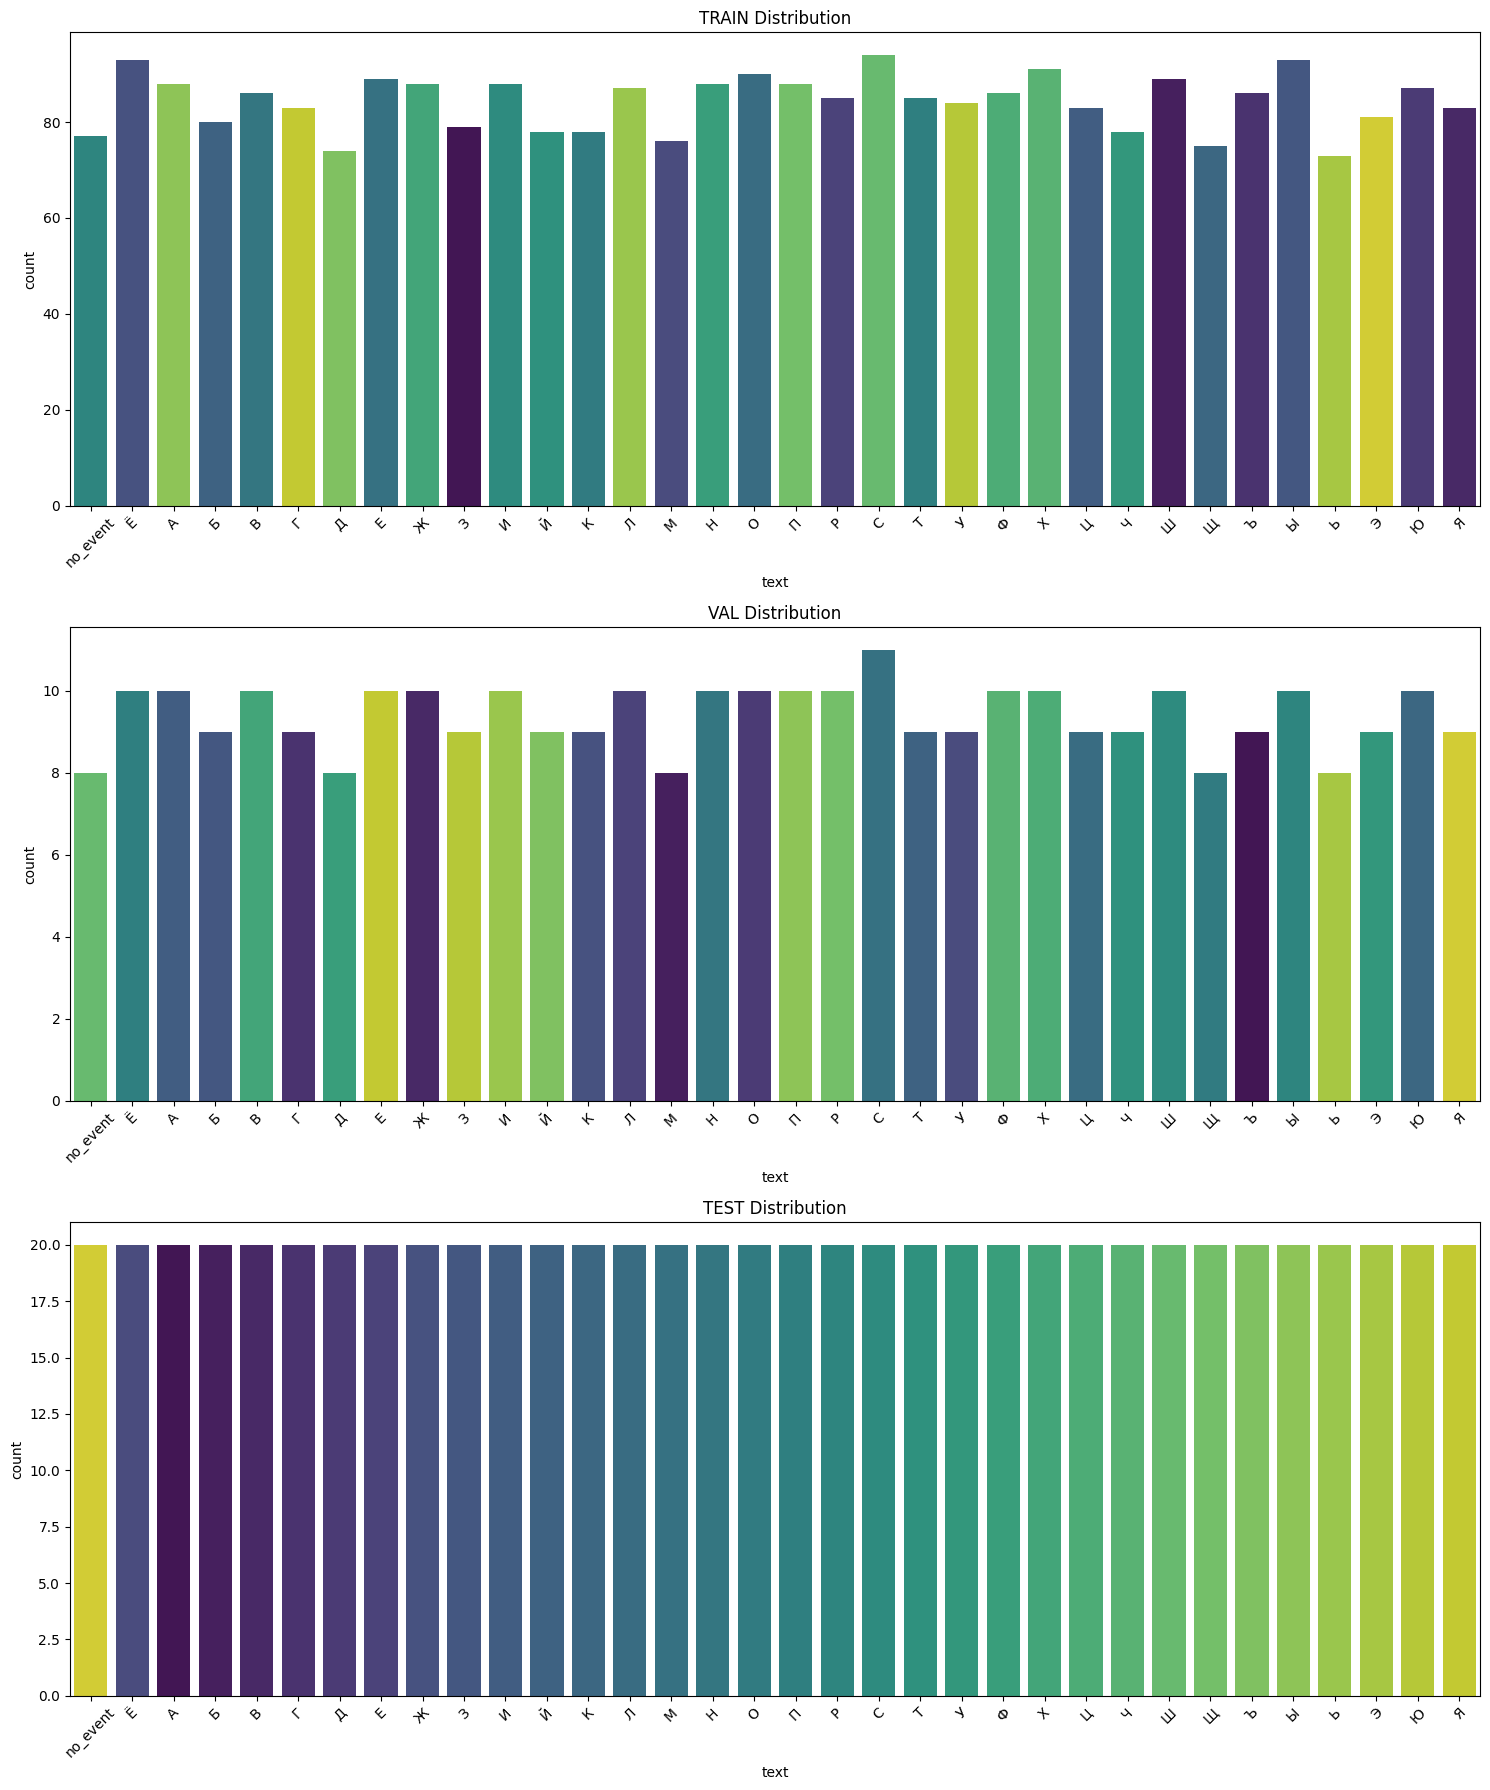

In [29]:
# Настройка визуализации
fig, axes = plt.subplots(3, 1, figsize=(15, 18))
order = sorted(final_df['text'].unique()) # Порядок букв

# 1. График Train
sns.countplot(data=final_df[final_df['split'] == 'train'], x='text', order=order, ax=axes[0], hue='text', palette='viridis', legend=False)
axes[0].set_title('TRAIN Distribution')
axes[0].tick_params(axis='x', rotation=45)

# 2. График Val
sns.countplot(data=final_df[final_df['split'] == 'val'], x='text', order=order, ax=axes[1], hue='text', palette='viridis', legend=False)
axes[1].set_title('VAL Distribution')
axes[1].tick_params(axis='x', rotation=45)

# 3. График Test
sns.countplot(data=final_df[final_df['split'] == 'test'], x='text', order=order, ax=axes[2], hue='text', palette='viridis', legend=False)
axes[2].set_title('TEST Distribution')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
x=1

In [30]:
final_df['split'].value_counts()

split
train    2863
test      680
val       319
Name: count, dtype: int64

In [31]:
final_df

,attachment_id,text,label_encoded,split
0,19c101b7-56e3-4889-abe2-8a54d392cbda,З,9,train
1,4aca7348-36a8-461c-97dc-ab913552dc16,Ш,26,train
2,023c35a2-deba-4569-b15e-418de9b98f61,Я,33,train
3,920488bb-c284-4afc-b6ae-790266425b57,Ъ,28,train
4,1f1d634900a16db742b507f6bdc0c3dc,Ю,32,train
...,...,...,...,...
3857,no_b458ea12-4097-426e-8f13-9976f62c87db,no_event,0,test
3858,no_c137dd3082afdd3d11c60f1fa73a66f3,no_event,0,test
3859,b46d11a69402158b94741a73cd0eebf8,Б,3,test
3860,c1413ca4f767a1e9bbaeca7120465de9,Ш,26,test


In [32]:
final_df.to_csv('annotations.csv', index=False)